# MapReader Workshop @ ADHO DH 2025
## Text Spotting with IIIF Resources



 

Written by Rosie Wood and Katherine McDonough.
Reviewed and tested by Kaspar Beelen and Daniel Wilson.

Learn more about the MapReader team at https://github.com/maps-as-data/MapReader?tab=readme-ov-file#contributors. 

In [31]:
# set up for google colab - this cell will take a while to run!
!git clone https://github.com/maps-as-data/workshop-dh2025
!pip install -r workshop-dh2025/requirements.txt

fatal: destination path 'workshop-dh2025' already exists and is not an empty directory.
  Cloning https://github.com/rwood-97/piffle.git (to revision iiif_dataclasses) to /private/var/folders/cp/c3csb3j930sc07xlht_k4wnw0000gr/T/pip-install-3qpz8flw/piffle_b7ea64c0b9b442198e8f40017fb9ce85
  Running command git clone --filter=blob:none --quiet https://github.com/rwood-97/piffle.git /private/var/folders/cp/c3csb3j930sc07xlht_k4wnw0000gr/T/pip-install-3qpz8flw/piffle_b7ea64c0b9b442198e8f40017fb9ce85
  Running command git checkout -b iiif_dataclasses --track origin/iiif_dataclasses
  Switched to a new branch 'iiif_dataclasses'
  branch 'iiif_dataclasses' set up to track 'origin/iiif_dataclasses'.
  Resolved https://github.com/rwood-97/piffle.git to commit f65cc3aeed09d91400c5f966a7d77e04b26d4e4f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pytest_cov-5.0.0-py3-none-any.whl.metadata (27 k

In [30]:
# enable custom widgets in colab
from google.colab import output
output.enable_custom_widget_manager()

ModuleNotFoundError: No module named 'google.colab'

# Download

In [46]:
from mapreader import IIIFDownloader

from piffle.load_iiif import load_iiif_image, load_iiif_presentation

In [47]:
# Manifest from Gallica - https://gallica.bnf.fr/iiif/ark:/12148/btv1b59719178/manifest.json

# Allmaps viewer - https://viewer.allmaps.org/?url=https://annotations.allmaps.org/images/3b1dc71e2f7f5488
# Allmaps georeference annotation - https://annotations.allmaps.org/images/3b1dc71e2f7f5488
# Allmaps xyz (map) - https://allmaps.xyz/maps/a6b77c925eeb6f71/{z}/{x}/{y}@2x.png


downloader = IIIFDownloader(
    "https://annotations.allmaps.org/images/3b1dc71e2f7f5488",
    iiif_versions=3,
    iiif_uris="https://annotations.allmaps.org/images/3b1dc71e2f7f5488"
)

[WARNING] AnnotationPage is missing 'id' field.


In [48]:
downloader.save_georeferenced_maps()

  0%|          | 0/1 [00:00<?, ?it/s]

[INFO] 'a6b77c925eeb6f71' already exists. Skipping download.


In [49]:

# load non-georeferenced IIIF image (not Allmaps annotations)


#iiif = "https://gallica.bnf.fr/iiif/ark:/12148/btv1b59719178/manifest.json"
#iiif = "https://content.staatsbibliothek-berlin.de/dc/1923075616/manifest"
#iiif = "https://jcb.lunaimaging.com/luna/servlet/iiif/m/JCBMAPS~1~1~1041~106880006/manifest"
iiif = "https://collections.leventhalmap.org/search/commonwealth:hx11z571f/manifest"
downloader = IIIFDownloader(
    iiif,
    iiif_versions=2,
    iiif_uris=iiif
)

[WARNING] Sequence is missing 'id' field.


In [50]:
downloader.save_maps()

  0%|          | 0/1 [00:00<?, ?it/s]

[INFO] '50959.hx11z571f.annotation.hx11z572q' already exists. Skipping download.


# Load

https://mapreader.readthedocs.io/en/latest/using-mapreader/step-by-step-guide/2-load.html

In [51]:
from mapreader import loader

In [52]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = None  # Disable limit on image size


# Question for Rosie: do each user have to manually set this using path to file created above?
my_files = loader("/Users/kmcdonough/Github/MapReader_all/workshop-dh2025/maps/50959.hx11z571f.annotation.hx11z572q.png")

  0%|          | 0/1 [00:00<?, ?it/s]

In [53]:
# len() shows the total number of images currently read (or sliced, see below)
print(f"Number of images: {len(my_files)}")

Number of images: 1


In [54]:
print(my_files)

#images: 1

#parents: 1
50959.hx11z571f.annotation.hx11z572q.png

#patches: 0



In [55]:
my_files.add_metadata("./maps/metadata.csv")

[INFO] Loading metadata from CSV/TSV/etc file.


ValueError: [ERROR] 'name' or 'image_id' should be one of the columns.

In [15]:
parent_list = my_files.list_parents()

## Patchify map

In [16]:
my_files.patchify_all(patch_size=1000, path_save="./patches_1000_pixel")  # in pixels

[INFO] Saving patches in directory named "./patches_1000_pixel".


  0%|          | 0/1 [00:00<?, ?it/s]

../mapreader-examples/notebooks/geospatial/iiif_download/maps/a6b77c925eeb6f71_masked.tif


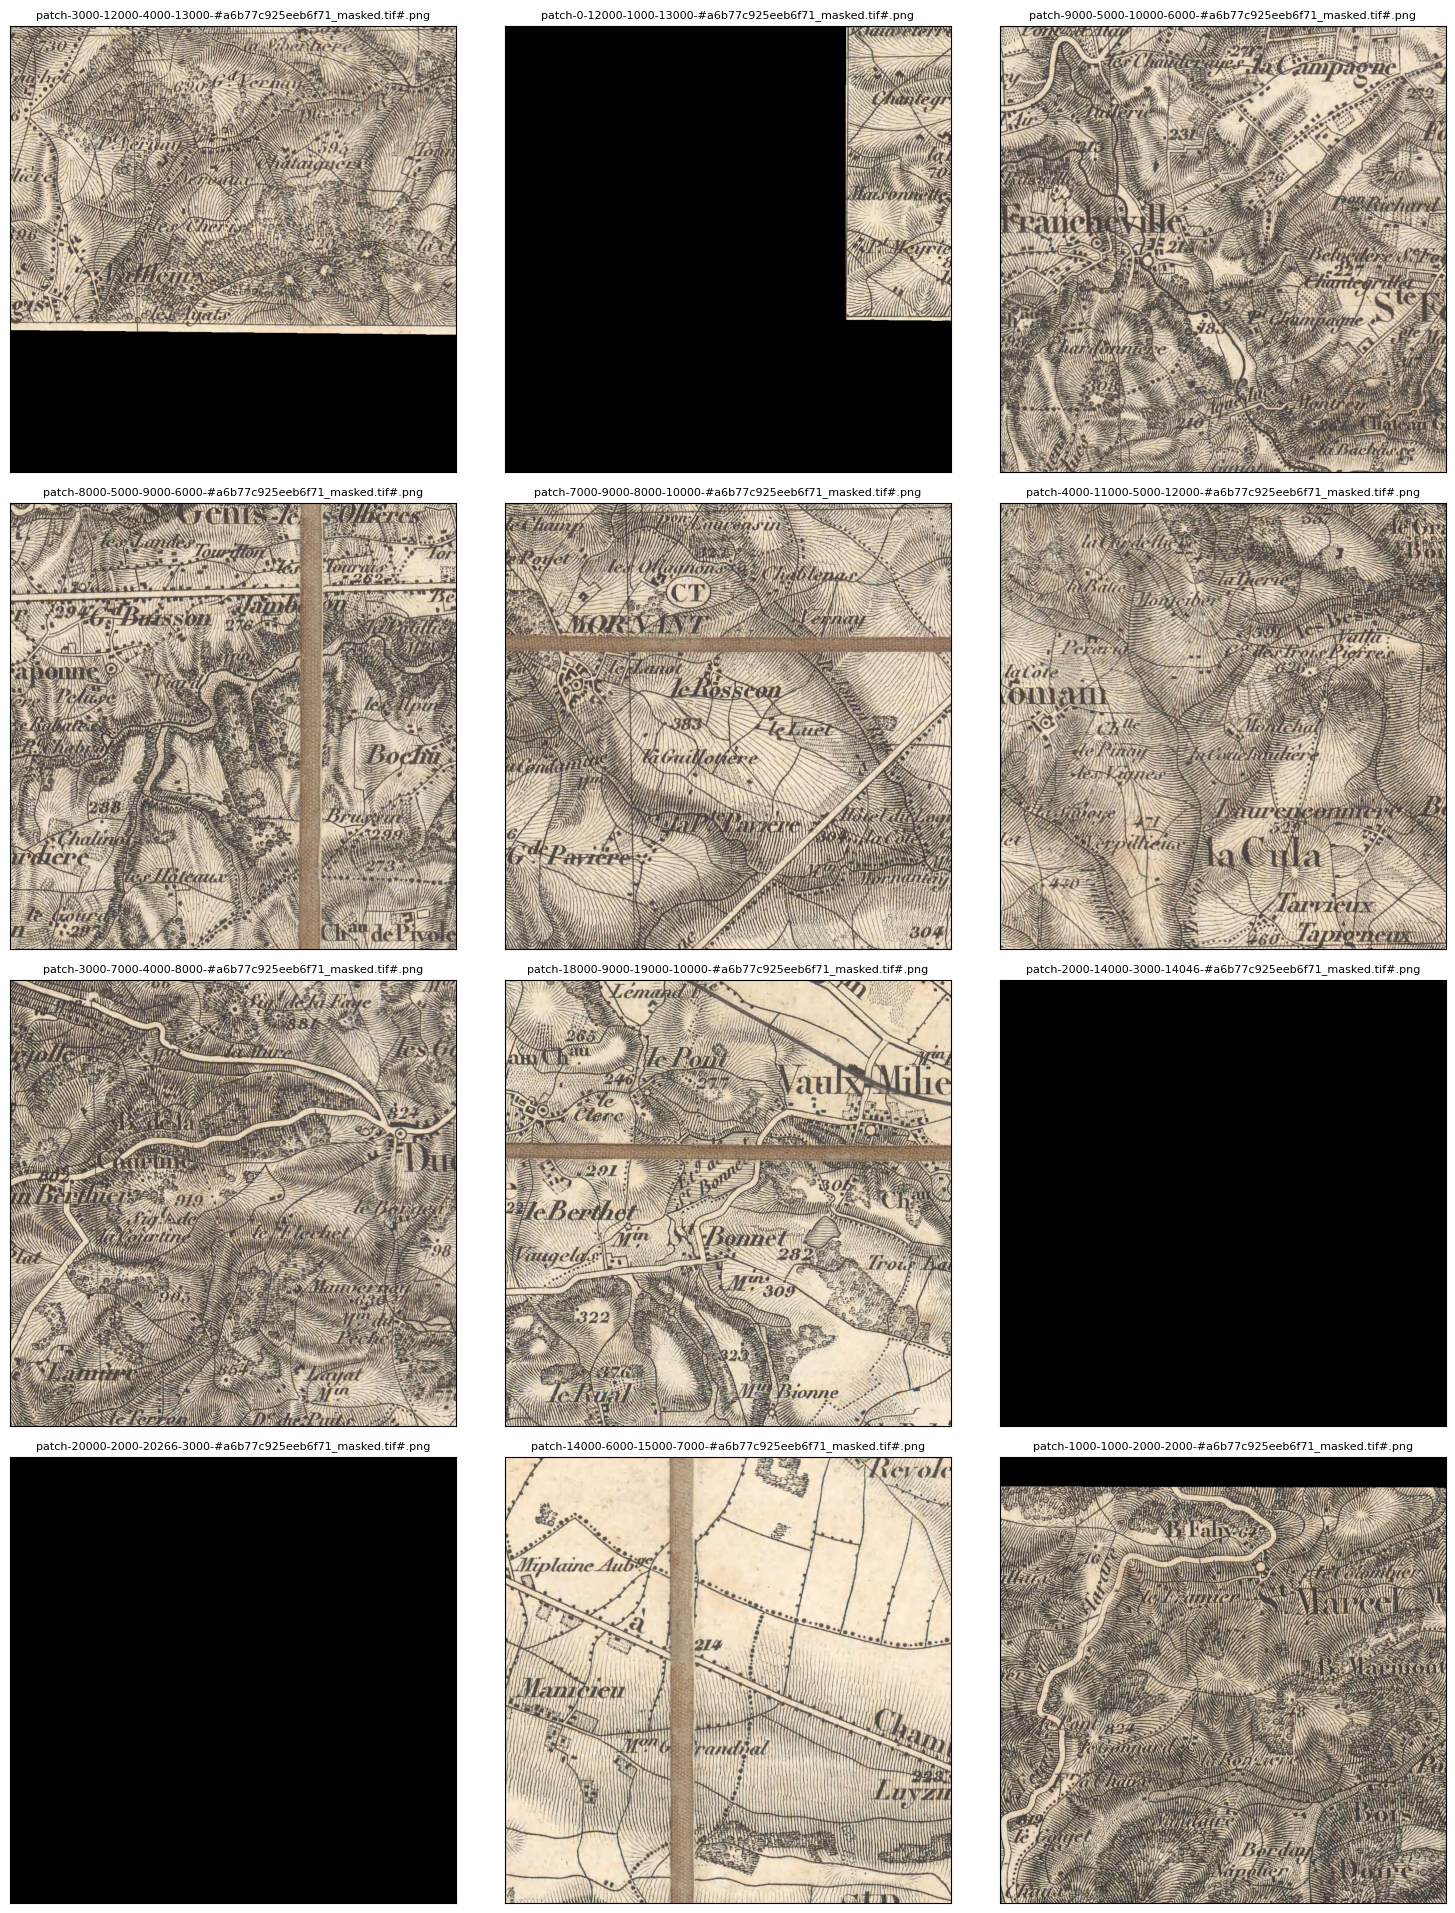

In [13]:
my_files.show_sample(num_samples=12, tree_level="patch")

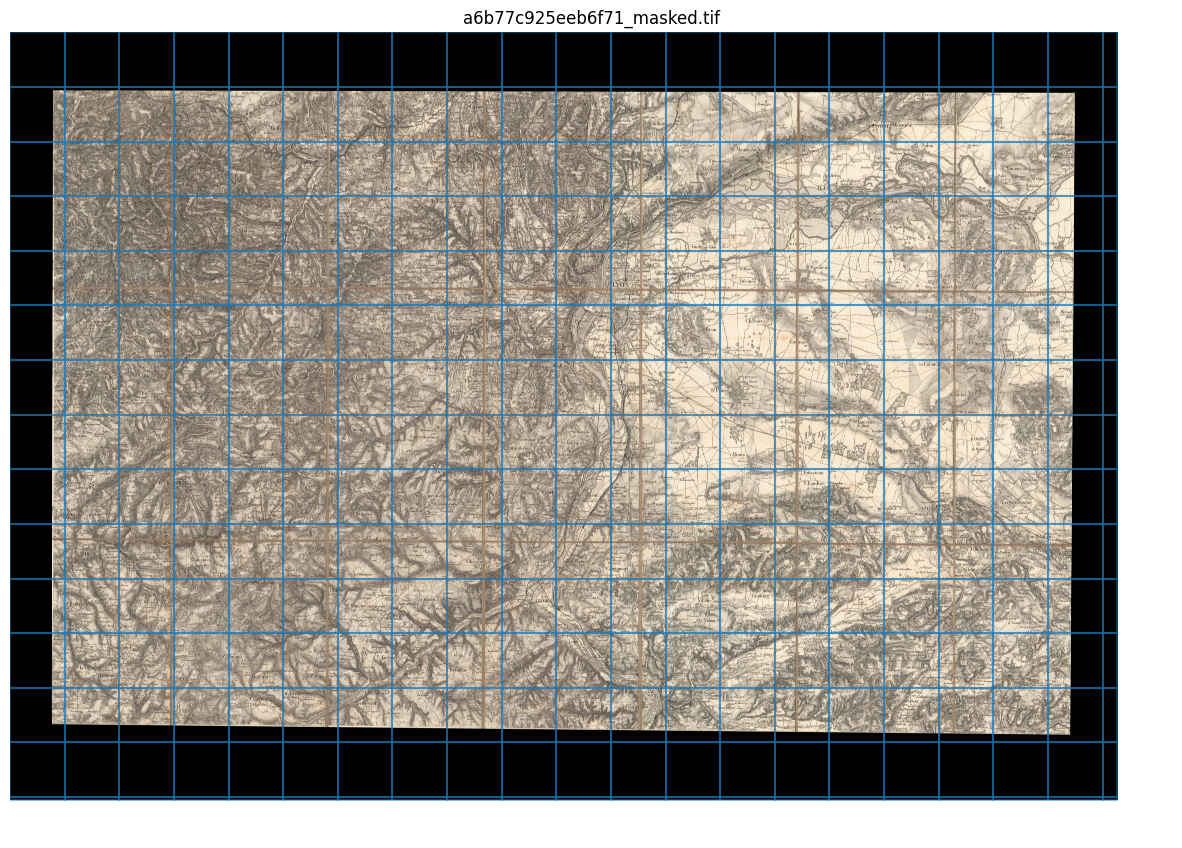

In [17]:
my_files.show_patches(
    parent_id=parent_list[0],
    figsize=(15, 15)
)

Add coordinate increments for text spotting (1 degree latitude = X pixels)

In [19]:
my_files.add_coord_increments()

[INFO] Add coord-increments, tree level: parent


  0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
parent_df, patch_df = my_files.convert_images(save=True)

[INFO] Saved parent dataframe as "parent_df.csv"
[INFO] Saved patch dataframe as "patch_df.csv"


In [21]:
parent_df.head()

parent_id  \
image_id                                
a6b77c925eeb6f71_masked.tif      None   

                                                                    image_path  \
image_id                                                                         
a6b77c925eeb6f71_masked.tif  /Users/kmcdonough/Github/MapReader_all/mapread...   

                                                                   coordinates  \
image_id                                                                         
a6b77c925eeb6f71_masked.tif  (4.3539327415061075, 45.46649003157989, 5.2543...   

                                   crs              shape  \
image_id                                                    
a6b77c925eeb6f71_masked.tif  EPSG:4326  (14046, 20266, 3)   

                                                                      geometry  \
image_id                                                                         
a6b77c925eeb6f71_masked.tif  POLYGON ((5.25440 45.46649, 5.25440 45.91261, ...   

                                                    name                id  \
image_id                                                                     
a6b77c925eeb6f71_masked.tif  a6b77c925eeb6f71_masked.tif  a6b77c925eeb6f71   

                                                                      iiif_uri  \
image_id                                                                         
a6b77c925eeb6f71_masked.tif  https://annotations.allmaps.org/images/3b1dc71...   

                                                                       patches  \
image_id                                                                         
a6b77c925eeb6f71_masked.tif  [patch-0-0-1000-1000-#a6b77c925eeb6f71_masked....   

                                 dlon      dlat  
image_id                                         
a6b77c925eeb6f71_masked.tif  0.000044  0.000032

In [21]:
patch_df.head()

parent_id  \
image_id                                                                          
patch-0-0-1000-1000-#a6b77c925eeb6f71_masked.ti...  a6b77c925eeb6f71_masked.tif   
patch-0-1000-1000-2000-#a6b77c925eeb6f71_masked...  a6b77c925eeb6f71_masked.tif   
patch-0-2000-1000-3000-#a6b77c925eeb6f71_masked...  a6b77c925eeb6f71_masked.tif   
patch-0-3000-1000-4000-#a6b77c925eeb6f71_masked...  a6b77c925eeb6f71_masked.tif   
patch-0-4000-1000-5000-#a6b77c925eeb6f71_masked...  a6b77c925eeb6f71_masked.tif   

                                                                                           image_path  \
image_id                                                                                                
patch-0-0-1000-1000-#a6b77c925eeb6f71_masked.ti...  /Users/kmcdonough/Github/MapReader_all/mapread...   
patch-0-1000-1000-2000-#a6b77c925eeb6f71_masked...  /Users/kmcdonough/Github/MapReader_all/mapread...   
patch-0-2000-1000-3000-#a6b77c925eeb6f71_masked...  /Users/kmcdonough/Github/MapReader_all/mapread...   
patch-0-3000-1000-4000-#a6b77c925eeb6f71_masked...  /Users/kmcdonough/Github/MapReader_all/mapread...   
patch-0-4000-1000-5000-#a6b77c925eeb6f71_masked...  /Users/kmcdonough/Github/MapReader_all/mapread...   

                                                              shape  \
image_id                                                              
patch-0-0-1000-1000-#a6b77c925eeb6f71_masked.ti...  (1000, 1000, 3)   
patch-0-1000-1000-2000-#a6b77c925eeb6f71_masked...  (1000, 1000, 3)   
patch-0-2000-1000-3000-#a6b77c925eeb6f71_masked...  (1000, 1000, 3)   
patch-0-3000-1000-4000-#a6b77c925eeb6f71_masked...  (1000, 1000, 3)   
patch-0-4000-1000-5000-#a6b77c925eeb6f71_masked...  (1000, 1000, 3)   

                                                             pixel_bounds  \
image_id                                                                    
patch-0-0-1000-1000-#a6b77c925eeb6f71_masked.ti...     (0, 0, 1000, 1000)   
patch-0-1000-1000-2000-#a6b77c925eeb6f71_masked...  (0, 1000, 1000, 2000)   
patch-0-2000-1000-3000-#a6b77c925eeb6f71_masked...  (0, 2000, 1000, 3000)   
patch-0-3000-1000-4000-#a6b77c925eeb6f71_masked...  (0, 3000, 1000, 4000)   
patch-0-4000-1000-5000-#a6b77c925eeb6f71_masked...  (0, 4000, 1000, 5000)   

                                                                                          coordinates  \
image_id                                                                                                
patch-0-0-1000-1000-#a6b77c925eeb6f71_masked.ti...  (4.3539327415061075, 45.88084529371504, 4.3983...   
patch-0-1000-1000-2000-#a6b77c925eeb6f71_masked...  (4.3539327415061075, 45.84908419742996, 4.3983...   
patch-0-2000-1000-3000-#a6b77c925eeb6f71_masked...  (4.3539327415061075, 45.81732310114488, 4.3983...   
patch-0-3000-1000-4000-#a6b77c925eeb6f71_masked...  (4.3539327415061075, 45.7855620048598, 4.39836...   
patch-0-4000-1000-5000-#a6b77c925eeb6f71_masked...  (4.3539327415061075, 45.75380090857472, 4.3983...   

                                                          crs  \
image_id                                                        
patch-0-0-1000-1000-#a6b77c925eeb6f71_masked.ti...  EPSG:4326   
patch-0-1000-1000-2000-#a6b77c925eeb6f71_masked...  EPSG:4326   
patch-0-2000-1000-3000-#a6b77c925eeb6f71_masked...  EPSG:4326   
patch-0-3000-1000-4000-#a6b77c925eeb6f71_masked...  EPSG:4326   
patch-0-4000-1000-5000-#a6b77c925eeb6f71_masked...  EPSG:4326   

                                                                                             geometry  
image_id                                                                                               
patch-0-0-1000-1000-#a6b77c925eeb6f71_masked.ti...  POLYGON ((4.39837 45.88085, 4.39837 45.91261, ...  
patch-0-1000-1000-2000-#a6b77c925eeb6f71_masked...  POLYGON ((4.39837 45.84908, 4.39837 45.88085, ...  
patch-0-2000-1000-3000-#a6b77c925eeb6f71_masked...  POLYGON ((4.39837 45.81732, 4.39837 45.84908, ...  
pa

In [22]:
patch_list = my_files.list_patches()

In [ ]:
# Question for Rosie: How to make this work for other people with different paths?

import os

MAPTEXT_PATH = "/Users/kmcdonough/Github/MapReader_all/MapTextPipeline"
MAPTEXT_MODEL_PATH = os.getenv("MAPTEXT_MODEL_PATH")

!pip install timm


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
# Question for Rosie: how to make this work for people with diff paths?

from mapreader import MapTextRunner

#EXAMPLE
my_runner = MapTextRunner(
    patch_df,
    parent_df,
    cfg_file = f"{MAPTEXT_PATH}/configs/ViTAEv2_S/rumsey/final_rumsey.yaml",
    weights_file = "/Users/kmcdonough/Github/MapReader_all/rumsey-finetune.pth"
)